<a href="https://colab.research.google.com/github/Juanjdurillo/Juanjdurillo.github.io/blob/master/LeNet_Keras_explained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Practicing with Convolutional Deep Neural Networks: LeNet

In this notebook we are going to construct (in Keras) the LeNet architecture for classifying the images in the mnist data set. These images are 28x28 pixel ones depicting the number from 0 to 9. The LeNet network will be used to learn the number depicted in each image. 

![LeNet Architecture](https://drive.google.com/uc?export=view&id=1U2-j1W2zW7-SssIAMHRdaaXrQHgmN7ld)




Before going into further details of the architecture and dataset, we are going to import all the libraries we are going to use. As  you will notice, most of them are from the Keras Framework and Tensorflow. 

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, MaxPooling2D,Flatten, Dense
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import np_utils 
import tensorflow as tf
from keras.preprocessing import image

import matplotlib.pyplot as plt


Using TensorFlow backend.


## Getting and Exploring the Dataset

We are loading the dataset using the Keras functionality. The dataset consits of 70,000 images. The function `mnist.load_data()` downloads the dataset and return two pairs: one containing data and labels for training and one containing data and training for validation.

In [2]:
 (x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
# input image dimensions 28x28 pixel images. 
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# one-hot encode the labels
# convert class vectors to binary class matrices
num_classes=10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

We could explore the dataset by plotting some of the images and the associated label to it. Bare in mind this label should be the ground truth for each of the considered images. 

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


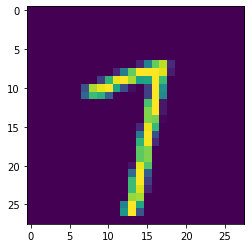

In [4]:

index = 42
plt.imshow(image.array_to_img(x_train[index]))
print(y_train[index])

## Building the LeNet Architecture

In [5]:
model = Sequential()

## Convolutional Part
The convolutional part of the LeNet architecture interleaves convolutional layers and pooling layers. We can describe this part as follows:


1.   Convolutional layer of depth 6 with filters 5x5
2.   Pooling layer using the max operation for elements of size 2x2
3.   Convolutional layer of depth 16 with filters 5x5
4.   Pooling layer using the max operation for elements of size 2x2
5.   Convolutional layer of depth 120 with filters 5x5

Lets add all these layers using the keras interface. Convolutional layers can be contructed with the keras function ```Conv2D()``` and Pooling layers using the average operation ```AveragePooling2D()``` or the max operation ```MaxPooling2D()```. 





In [6]:
# First Convolutional Layer (depth = 6 and filter size = 5x5)
model.add(Conv2D(filters=6, kernel_size=5, strides=1, activation='tanh', input_shape = (28,28,1), padding='same'))
# First Pooling layer
model.add(MaxPooling2D(pool_size=2,strides=2, padding='valid'))
# Second Convolutional Layer (depth = 16 filter size = 5x5)
model.add(Conv2D(filters=16,kernel_size=5,strides=1,activation='tanh',padding='valid'))
# Second Pooling layer
model.add(MaxPooling2D(pool_size=2,strides=2,padding='valid'))
# Third Convolutional Layer (depth = 120 and filter size= 5x5)
model.add(Conv2D(filters=120,kernel_size=5,strides=1,activation='tanh',padding='valid'))

The output of the convolutional part is a set of feature maps (i.e., the convoluted images resulting of convoluting the filters and images or feature maps from previous layers). These images are matrices of ```w``` channels. These matrices form the input for the upcoming fully connected layer. As the input of a NN is vector, the feature maps are flattened into a vector. The function ```Flatten()``` is in charge of this. 

In [7]:
# Next layer is a fully conneted NN, so we need flattering the output of the previous layer
model.add(Flatten())

Creating two layers of fully connected networks. 

In [8]:
# First Layer of the fully connected neural network for classification
model.add(Dense(units=84, activation='tanh'))
# Secon layer of the fully connected neurla network (the output of the whole network)
model.add(Dense(units=10,activation='softmax'))

In Keras, the method ```sumary()``` of the model shows the output shape and number of parameters of each and every layer, as well as the whole network. 

In [9]:
#model.summary()

Once the model has been created, we need to choose an optimizer in charge of minimizing the loss function and configure the model with an optimizer and a loss function. In this example, we are going to choose the Stochastic Gradient Descent and the categorical cross entropy loss function. 

In [10]:
opt = SGD()
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

After all the previous steps, we are already at the point where our model can be trained. For this, we will use the ```fit()``` function in Keras. This function requires to provide the training data as wellas the validation dataset. 

In [11]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test), verbose=2, shuffle=True)


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 13s - loss: 0.3733 - accuracy: 0.9087 - val_loss: 0.1525 - val_accuracy: 0.9581
Epoch 2/20
 - 7s - loss: 0.1300 - accuracy: 0.9628 - val_loss: 0.1035 - val_accuracy: 0.9698
Epoch 3/20
 - 7s - loss: 0.1026 - accuracy: 0.9700 - val_loss: 0.0833 - val_accuracy: 0.9743
Epoch 4/20
 - 7s - loss: 0.0853 - accuracy: 0.9749 - val_loss: 0.0741 - val_accuracy: 0.9771
Epoch 5/20
 - 7s - loss: 0.0748 - accuracy: 0.9776 - val_loss: 0.0702 - val_accuracy: 0.9793
Epoch 6/20
 - 7s - loss: 0.0669 - accuracy: 0.9799 - val_loss: 0.0599 - val_accuracy: 0.9806
Epoch 7/20
 - 7s - loss: 0.0613 - accuracy: 0.9818 - val_loss: 0.0567 - val_accuracy: 0.9823
Epoch 8/20
 - 7s - loss: 0.0577 - accuracy: 0.9826 - val_loss: 0.0538 - val_accuracy: 0.9825
Epoch 9/20
 - 7s - loss: 0.0520 - accuracy: 0.9844 - val_loss: 0.0507 - val_accuracy: 0.9842
Epoch 10/20
 - 7s - loss: 0.0476 - accuracy: 0.9855 - val_loss: 0.0519 - val_accuracy: 0.9837
Epoch 11/20
 - 7s 

## Analysing the Results
Let's observe what happens with the accuracy and the loss on the training as well as the validation sets. 

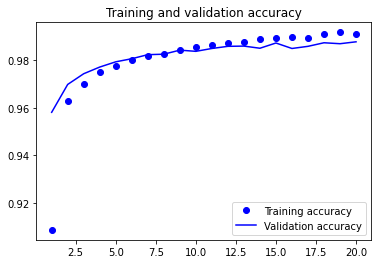

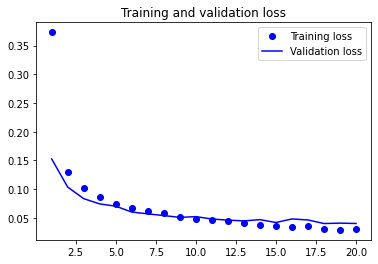

In [18]:
# Obtaining information from the history 
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Plotting information
epochs = range(1, len(acc)+ 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


## Using the network to predict unseen images

tf.Tensor(0, shape=(), dtype=int64)


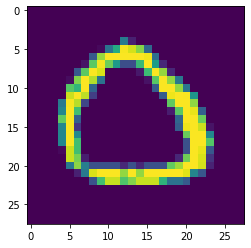

In [21]:
from keras.preprocessing import image
test_index = 126
plt.imshow(image.array_to_img(x_test[test_index]))
test_score = model.predict(x_test[test_index:test_index+1])
prediction = tf.argmax(test_score[0])
print(prediction)